In [2]:
import numpy as np
import random

from trmf import trmf
from trmf_regressor import *
# from synthetic_data import SyntheticData

import matplotlib.pyplot as plt
%matplotlib inline
import sys
sys.path.insert(1,'D:\TMU_codes\Thesis_codes\codes')
from package.featureSelection_SICE import *
from package.loadDb import *

In [3]:
# # data with target column
# address = "..\database\stock market dataset"
# data_with_target=load_stock_market_dataframe(address+"\sample_normalized_with_target.csv")
# data_with_target=data_with_target.iloc[60000:80000]

# # data_without_target=data_with_target.iloc[:,:-1]
# target=data_with_target.iloc[:,-1]
# ..............................................
address = "..\database\kaggleDataFrame"
data_with_target= load_kaggle_dataframe(address+"\dataframes.csv")
# data_with_target=data_with_target.iloc[:220]

data_without_target = data_with_target.drop(['DEMAND'],axis=1)

target=data_with_target.iloc[:,-1]
# ..............................................
print("data with target size = ",data_with_target.shape )

# X_pca=compute_pca(data_without_target,num_comp=None)

data with target size =  (46968, 11)


In [3]:
num_comp=5
# window_size=10
interval = 2000
testSize=500

number of windows= 1000 
size of windows = 2
[1.8956047619464065, 1.8956031295208635, 1.8956034636757695, 1.8956066972656944, 1.894681376288231, 1.894207470533881, 1.895421469012302, 1.8954021823034322, 1.8922974022051426, 1.8955563417135277] [3, 0, 2, 1, 9, 6, 7, 4, 5, 8]
0.0
----------------------------------------------------------------------------
number of windows= 1000 
size of windows = 2
[1.8956154524156519, 1.8956142141614611, 1.8956162243374948, 1.8956164248547207, 1.8947202850692477, 1.8940033018533202, 1.8954549035082102, 1.8954549035082102, 1.892322389185165, 1.895565573621654] [3, 2, 0, 1, 9, 6, 7, 4, 5, 8]
1.0
----------------------------------------------------------------------------
number of windows= 1000 
size of windows = 2
[1.8956176253793258, 1.8956134020384905, 1.8956151101257483, 1.8956155052312824, 1.8947132207009978, 1.8939930267616687, 1.895466407142873, 1.895466407142873, 1.8923199778061859, 1.8955628596879728] [0, 3, 2, 1, 9, 6, 7, 4, 5, 8]
2.0
----------

<AxesSubplot: title={'center': 'num_comp=5'}>

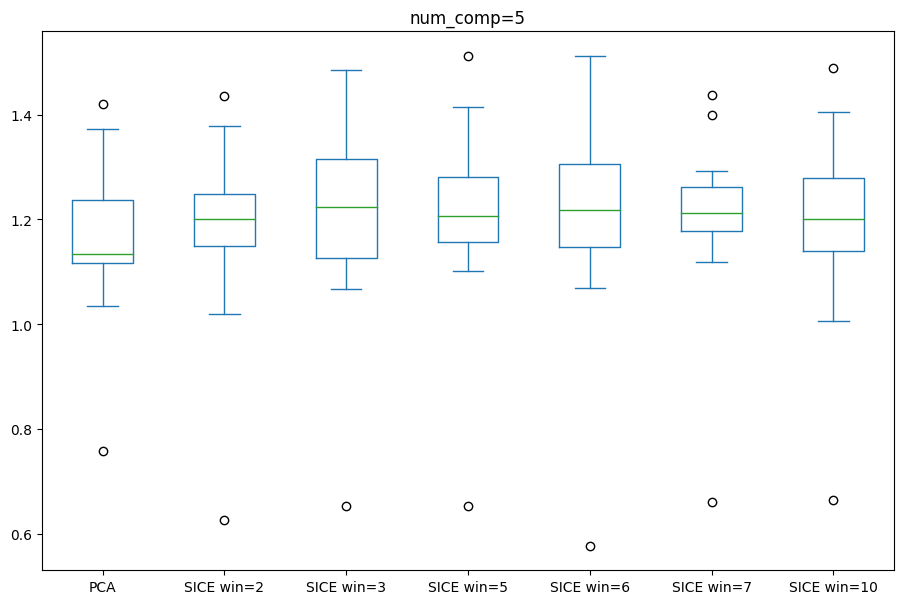

In [4]:
counter=0
pca_list=[]
dict_mse={}

while counter+interval <= data_with_target.shape[0]:


    datacut=data_with_target[counter:counter+interval]
    X_datacut=datacut.iloc[:,:-1]
    Y_datacut=datacut.iloc[:,-1]
    # print(counter,X_datacut.shape)
    X_pca=compute_pca(X_datacut,num_comp=num_comp)
# .............................................................trmf
    # pca_mse=xgboost_reg_error(X_pca,Y_datacut,testSize)
    pca_mse=trmf_reg_error(pd.DataFrame(X_pca),Y_datacut,testSize=testSize,lags = [1,25],K = 4,lambda_f = 1.,lambda_x = 1.,lambda_w = 1.,alpha = 1000.,eta = 1., max_iteration=10000)

    pca_list.append(pca_mse)##########################
    counter+=interval
dict_mse['PCA']=pca_list

    
for window_size in [2,3,5,6,7,10]:
    method_list = []
    counter=0

    while counter+interval <= data_with_target.shape[0]:


        datacut=data_with_target[counter:counter+interval]
        X_datacut=datacut.iloc[:,:-1]
        Y_datacut=datacut.iloc[:,-1]

        selected_features_index=featureSelection(X_datacut,window_size)
        selected_data= X_datacut[X_datacut.columns[selected_features_index]]
        # mse=xgboost_reg_error(selected_data[:,:num_comp],Y_datacut,testSize)
        mse=trmf_reg_error(selected_data.iloc[:,:num_comp],Y_datacut,testSize=testSize,lags = [1,25],K = 4,lambda_f = 1.,lambda_x = 1.,lambda_w = 1.,alpha = 1000.,eta = 1., max_iteration=10000)
        

        method_list.append(mse)
        #     print( "method_list",method_list)
        print(counter/interval)
        print("----------------------------------------------------------------------------")
        counter+=interval
    dict_mse["SICE win={}".format(window_size)]=method_list
    
dataframe = pd.DataFrame(dict_mse)
plt.rcParams["figure.figsize"] = [11,7]
dataframe.plot(kind="box",title="num_comp={}".format(num_comp))

In [6]:
df=pd.DataFrame(columns=dataframe.columns)
df.loc['Var'] =list(dataframe.var())
df.loc['Mean'] =list(dataframe.mean())
df.loc['Min'] =list(dataframe.min())
df.loc['Max'] =list(dataframe.max())

<AxesSubplot: >

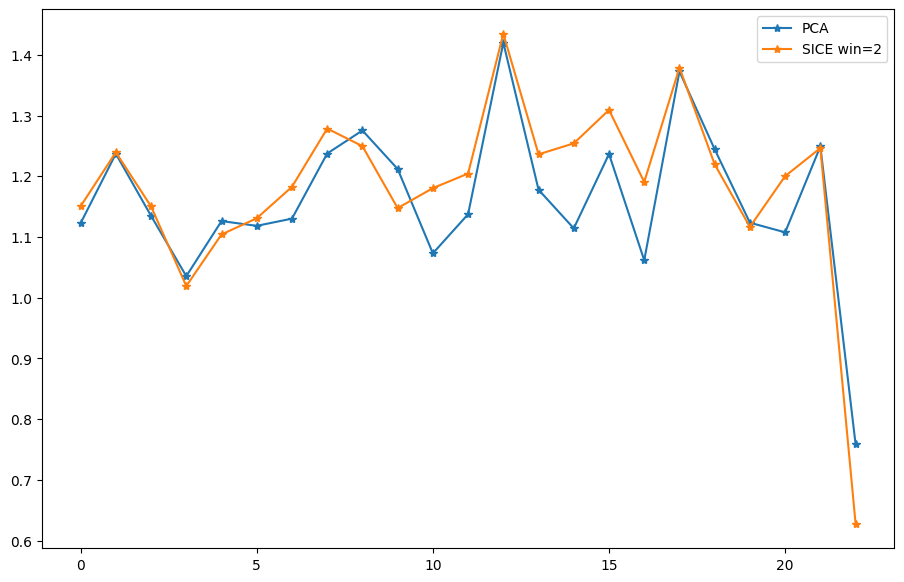

In [7]:
dataframe.iloc[:,[0,1]].plot(kind='line', marker='*')

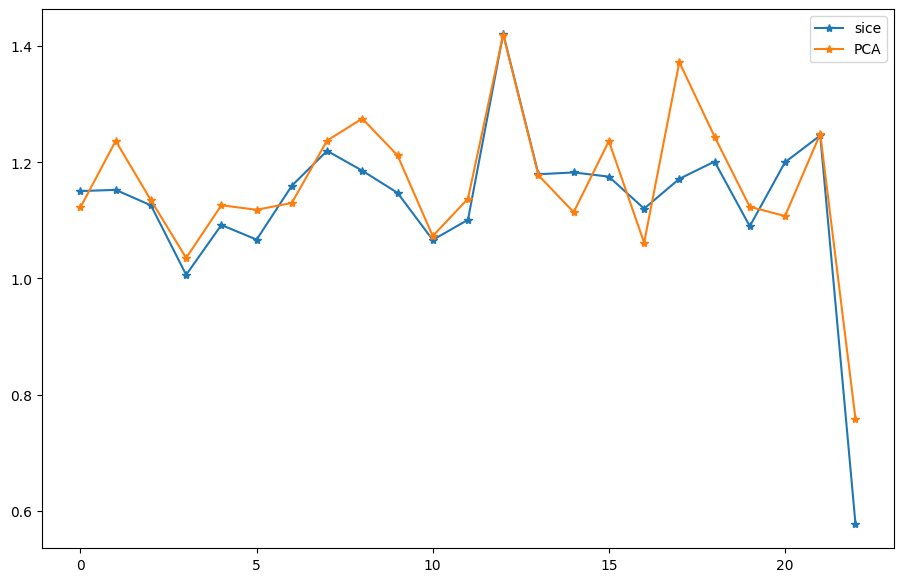

In [9]:
# minimum of each roe except pca 
dataframe.iloc[:,1:].min(axis=1).plot(kind='line', marker='*',label="sice")

plt.legend()
dataframe.iloc[:,0].plot(kind='line', marker='*')
plt.legend()